# **Imaging dataset**

In [4]:
!pip install tensorflow
!pip install scikit-learn matplotlib --quiet


  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 823.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.8 MB/s eta 0:00:00


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged dataset ready
Balanced Count — Normal: 477 Tumor: 477
Train/Test created with balance
Found 563 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.6721 - loss: 0.6033 - val_accuracy: 0.5455 - val_loss: 0.6881 - learning_rate: 1.0000e-04
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - accuracy: 0.7926 - loss: 0.3941 - val_accuracy: 0.5455 - val_loss: 0.7030 - learning_rate: 1.0000e-04
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - accuracy: 0.8684 - loss: 0.2852 - val_accuracy: 0.5455 - val_loss: 0.6988 - learning_rate: 1.0000e-04
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - accuracy: 0.8897 - loss: 0.2404 - val_accuracy: 0.5455 - val_loss: 0.7005 - learning_rate: 1.0000e-04
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 406ms/step - accuracy: 0.8967 - loss: 0.2313 - val_accuracy: 0.5511 - val_loss: 0.6840 - learning_rate: 5.0000e-05
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 398ms/step - accuracy: 0.9491 - loss: 0.1754 - val_accuracy: 0.6534 - val_loss: 0.5985 - learning_rate: 5.0000e-05
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accur

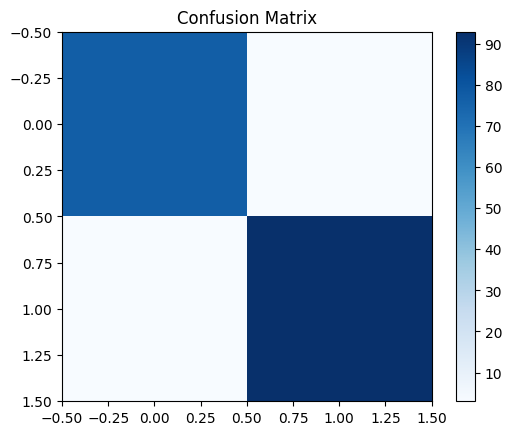

In [3]:
# ===============================
# 1. Install + Mount Drive
# ===============================
!pip install tensorflow matplotlib scikit-learn --quiet

from google.colab import drive
drive.mount('/content/drive')


# ===============================
# 2. Dataset Paths
# ===============================
import os, shutil

base = "/content/drive/MyDrive/images data nlp"

normal_src = base + "/Normal cases"
tumor_srcs = [
    base + "/Malignant cases",
    base + "/Benign cases",
    base + "/Test cases"
]

# Clean old folders
shutil.rmtree("/content/LungCancer_2class", ignore_errors=True)
shutil.rmtree("/content/train", ignore_errors=True)
shutil.rmtree("/content/test", ignore_errors=True)

# Prepare merged dataset
new_base = "/content/LungCancer_2class"
normal_dst = new_base + "/Normal"
tumor_dst = new_base + "/Tumor"

os.makedirs(normal_dst, exist_ok=True)
os.makedirs(tumor_dst, exist_ok=True)

for f in os.listdir(normal_src):
    shutil.copy(os.path.join(normal_src, f), normal_dst)

for folder in tumor_srcs:
    for f in os.listdir(folder):
        shutil.copy(os.path.join(folder, f), tumor_dst)

print("Merged dataset ready")


# ===============================
# 3. Balanced Train/Test Split
# ===============================
import glob
from sklearn.model_selection import train_test_split

normal_images = glob.glob(normal_dst + "/*")
tumor_images  = glob.glob(tumor_dst + "/*")

# Balance dataset by oversampling the minority class
import random

if len(normal_images) < len(tumor_images):
    diff = len(tumor_images) - len(normal_images)
    normal_images += random.choices(normal_images, k=diff)

elif len(tumor_images) < len(normal_images):
    diff = len(normal_images) - len(tumor_images)
    tumor_images += random.choices(tumor_images, k=diff)

print("Balanced Count — Normal:", len(normal_images), "Tumor:", len(tumor_images))

# Split (80/20)
n_train, n_test = train_test_split(normal_images, test_size=0.2, random_state=42)
t_train, t_test = train_test_split(tumor_images,  test_size=0.2, random_state=42)

# Create folders
train_dir = "/content/train"
test_dir  = "/content/test"

os.makedirs(train_dir + "/Normal", exist_ok=True)
os.makedirs(train_dir + "/Tumor", exist_ok=True)
os.makedirs(test_dir + "/Normal", exist_ok=True)
os.makedirs(test_dir + "/Tumor", exist_ok=True)

for f in n_train: shutil.copy(f, train_dir + "/Normal")
for f in n_test:  shutil.copy(f, test_dir  + "/Normal")
for f in t_train: shutil.copy(f, train_dir + "/Tumor")
for f in t_test:  shutil.copy(f, test_dir  + "/Tumor")

print("Train/Test created with balance")


# ===============================
# 4. Data Generators
# ===============================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 256
BATCH = 16

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    shear_range=0.15,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='binary',
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='binary',
    shuffle=False
)


# ===============================
# 5. Model: EfficientNetB3
# ===============================
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_model = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
out = Dense(1, activation="sigmoid")(x)

model = Model(base_model.input, out)

model.compile(
    optimizer=Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

es = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=40,
    callbacks=[es, rlr]
)


# ===============================
# 6. Evaluation
# ===============================
loss, acc = model.evaluate(test_data)
print("Test Accuracy:", acc)

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32").flatten()

print(classification_report(y_true, y_pred, target_names=["Normal","Tumor"]))

cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


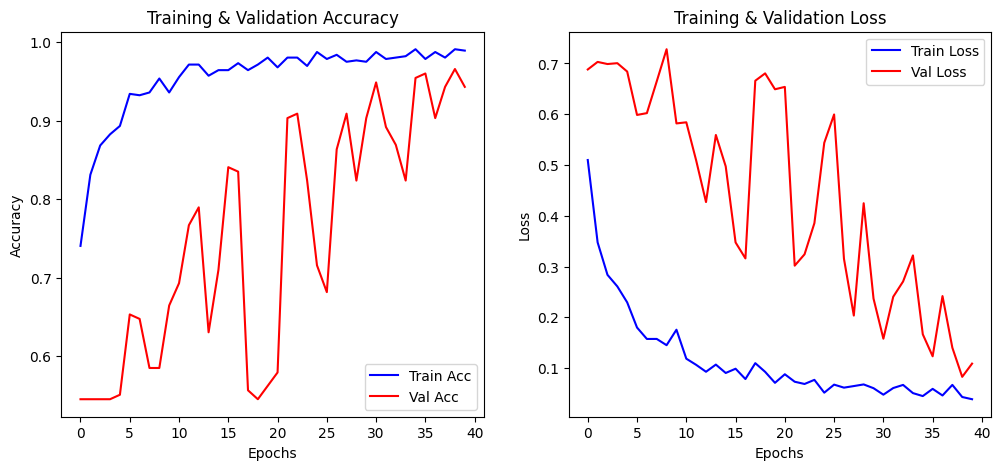

In [4]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Train Acc')
plt.plot(epochs, val_acc, 'r', label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


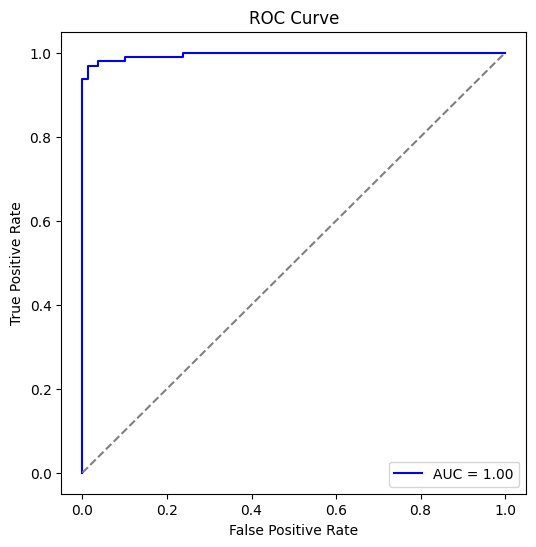

In [5]:
from sklearn.metrics import roc_curve, auc

y_true = test_data.classes
y_pred_prob = model.predict(test_data).flatten()

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [13]:
!pip install shap lime --quiet


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━

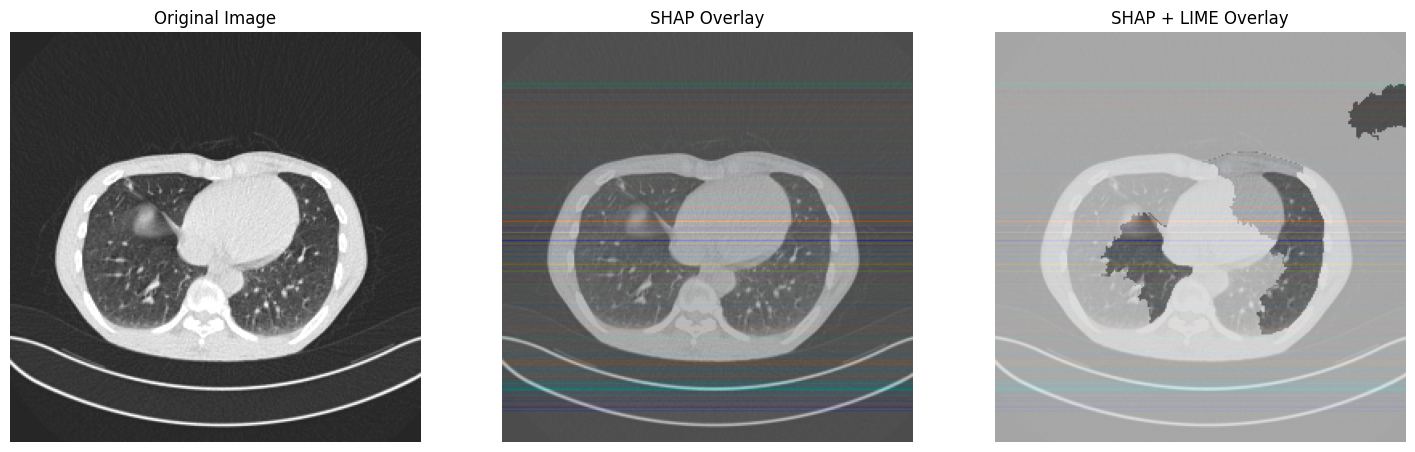

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━

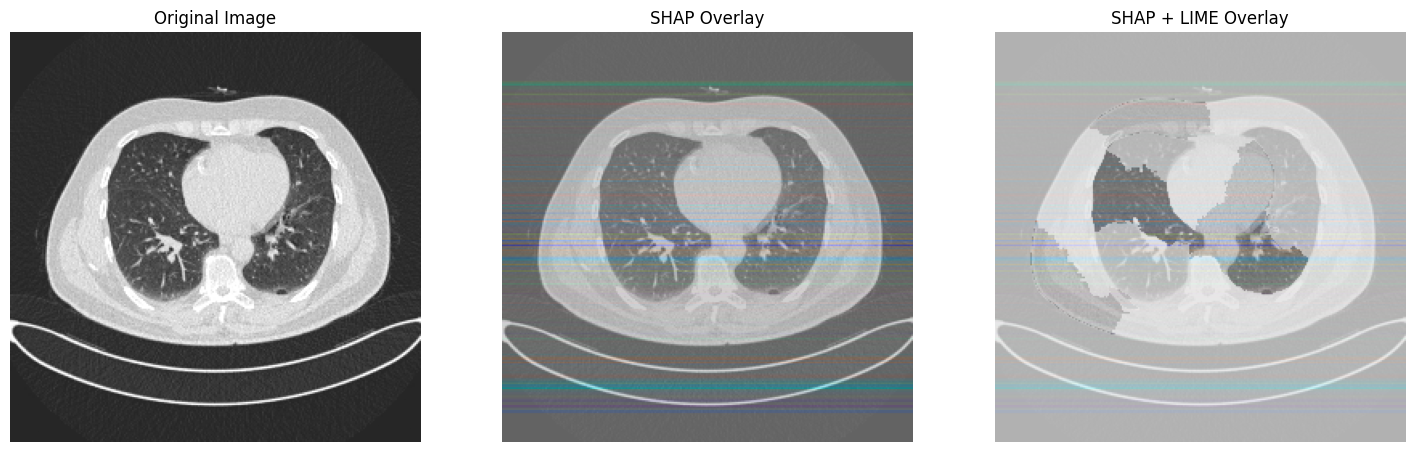

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

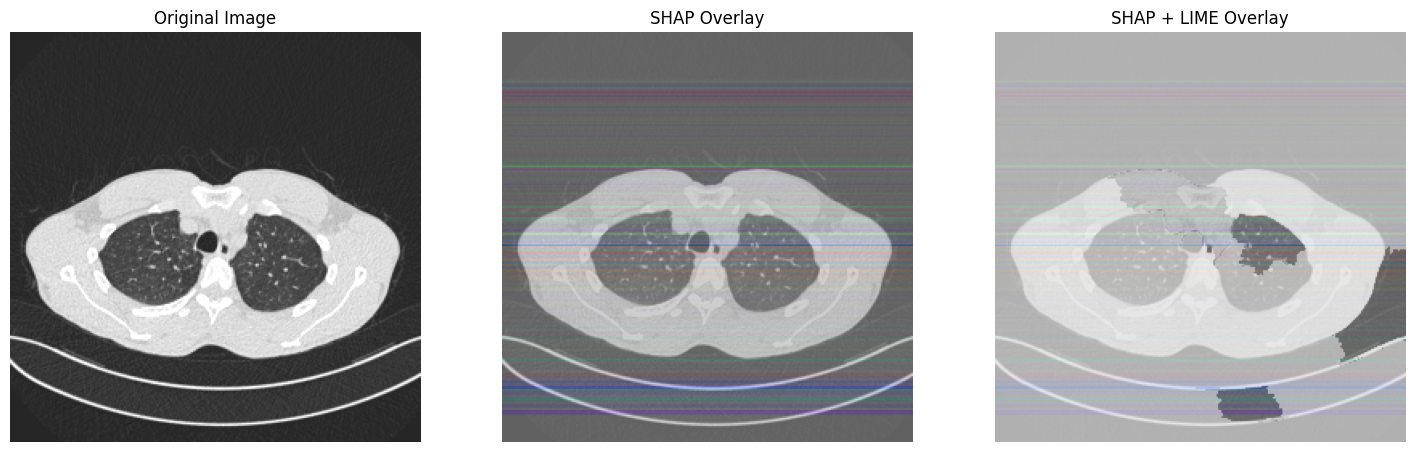

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134m

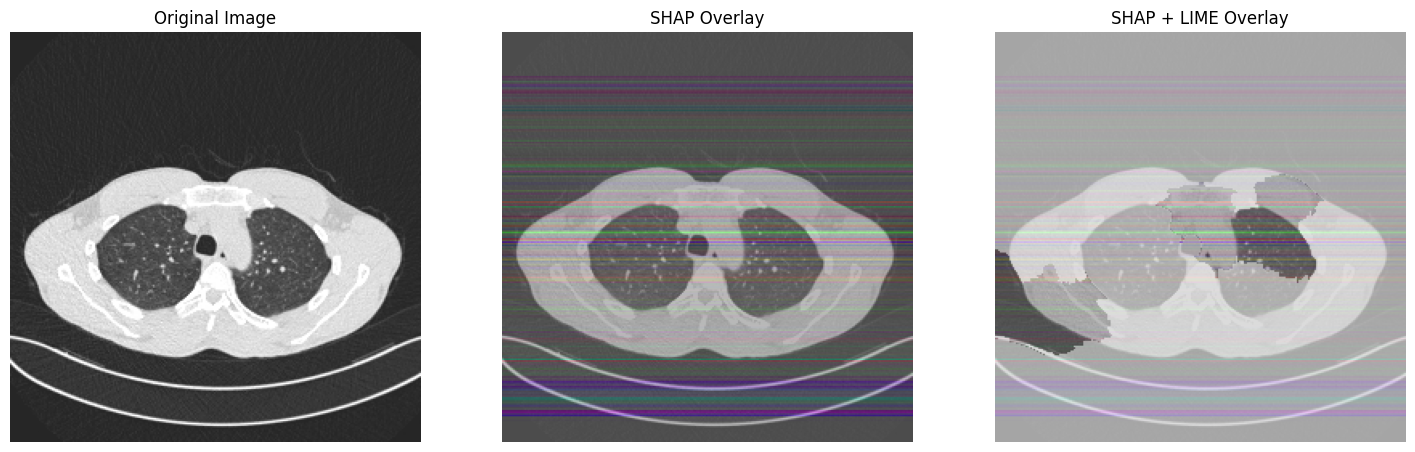

In [28]:

import shap
from lime import lime_image
from skimage.segmentation import slic
import matplotlib.pyplot as plt
import numpy as np

X_test_batch, y_test_batch = next(test_data)
X_sample = X_test_batch[:4]   # first 4 images

# -------------------------------
# SHAP Explainer
# -------------------------------
background = X_sample[:2]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(X_sample)

def fix_shap_shape(sv, img_shape):
    """Fix SHAP shape to match image"""
    sv = np.array(sv)
    if sv.shape != img_shape:
        if sv.shape[0] == img_shape[0] and sv.shape[1] == img_shape[2]:
            sv = np.transpose(sv, (0, 2, 1))
    if sv.shape[-1] != 3:
        sv = np.repeat(sv[..., :1], 3, axis=-1)
    sv = (sv - sv.min()) / (sv.max() - sv.min() + 1e-8)
    return sv

shap_values_fixed = [fix_shap_shape(shap_values[0][i], X_sample[i].shape) for i in range(len(X_sample))]

# -------------------------------
# LIME Explainer
# -------------------------------
lime_explainer = lime_image.LimeImageExplainer()

# -------------------------------
# Plot combined overlay
# -------------------------------
alpha = 0.5  # blending factor for SHAP
for i in range(len(X_sample)):
    img = X_sample[i]

    # SHAP overlay
    shap_img = shap_values_fixed[i]
    shap_overlay = img.astype(np.float32) * (1 - alpha) + shap_img.astype(np.float32) * alpha

    # LIME explanation
    explanation = lime_explainer.explain_instance(
        img,
        model.predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    lime_overlay = shap_overlay.copy()
    lime_overlay[mask == 0] = lime_overlay[mask == 0] * 0.5 + 0.5

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(18,6))

    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title("Original Image")

    axs[1].imshow(shap_overlay)
    axs[1].axis('off')
    axs[1].set_title("SHAP Overlay")

    axs[2].imshow(lime_overlay)
    axs[2].axis('off')
    axs[2].set_title("SHAP + LIME Overlay")

    plt.show()
